In [9]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *

In [10]:
import os

print(os.getcwd())

/Users/ykdsg/my_workspace/python_ws/myPython/programmers_mathematical/Chapter02


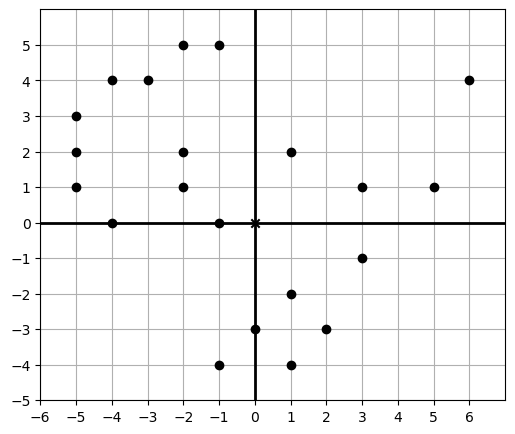

In [11]:
dino_vectors = [(6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4),
                (-5, 3), (-5, 2), (-2, 2), (-5, 1), (-4, 0), (-2, 1), (-1, 0), (0, -3),
                (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1)
                ]

draw(
    # point 用于绘制多个点，每个点对应一个输入向量
    Points(*dino_vectors)
)

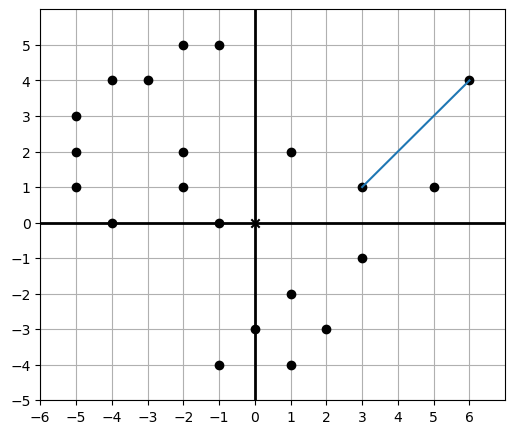

In [12]:
draw(
    Points(*dino_vectors),
    # Segment 从start到end 绘制一条线段
    Segment((6, 4), (3, 1))
)

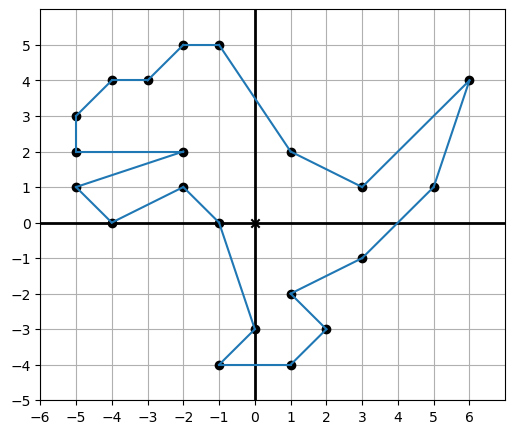

In [13]:
draw(
    Points(*dino_vectors),
    # Polygon 绘制多边形，多边形的顶点为输入向量
    Polygon(*dino_vectors)
)

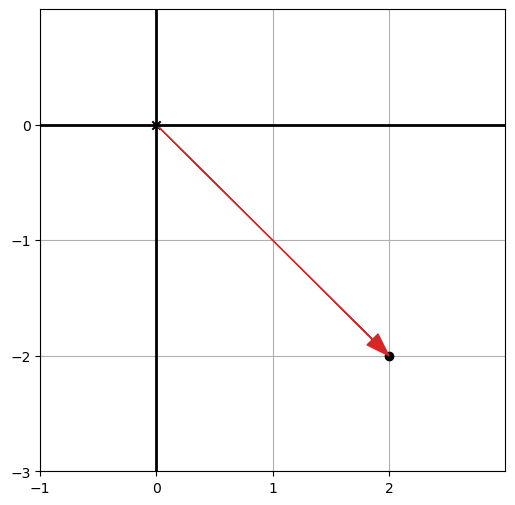

In [14]:
point = (2, -2)
draw(
    Points(point),
    Arrow(point)
)

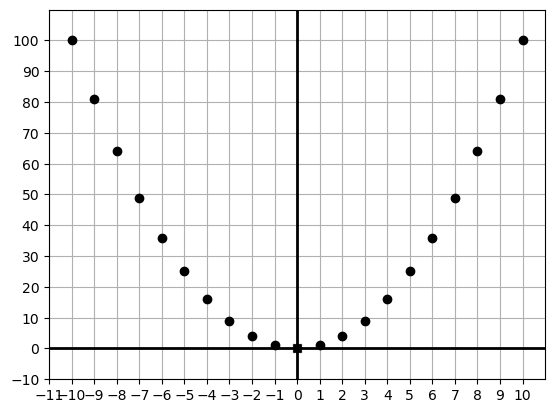

In [15]:
draw(
    Points(*[(x, x ** 2) for x in range(-10, 11)]),
    # 每隔1个单位绘制垂直网格线，以及每隔10个单位绘制水平网格线
    grid=(1, 10),
    # 设置为False，表示x轴和y轴的比例不必相同
    nice_aspect_ratio=False
)

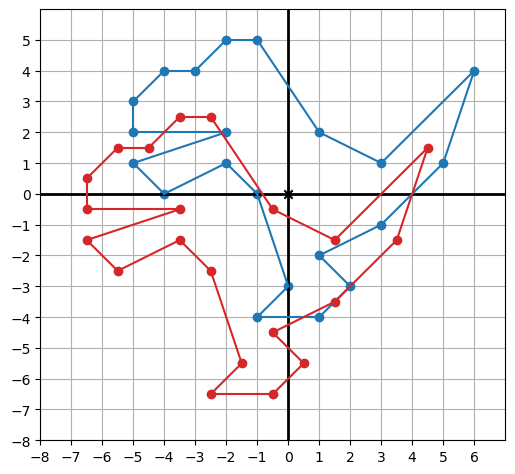

In [16]:
def add(v1, v2):
    return (v1[0] + v2[0], v1[1] + v2[1])


dino_vectors2 = [add((-1.5, -2.5), v) for v in dino_vectors]
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
)

In [17]:
def add(*vectors):
    return (sum(v[0] for v in vectors), sum(v[1] for v in vectors))


# 代表平移之后的坐标
def translate(translation, vectors):
    return [add(translation, v) for v in vectors]
    # return [(translation[0] + v[0], translation[1] + v[1]) for v in vectors]


translate((1, 1), [(0, 0), (0, 1,), (-3, -3)])

[(1, 1), (1, 2), (-2, -2)]

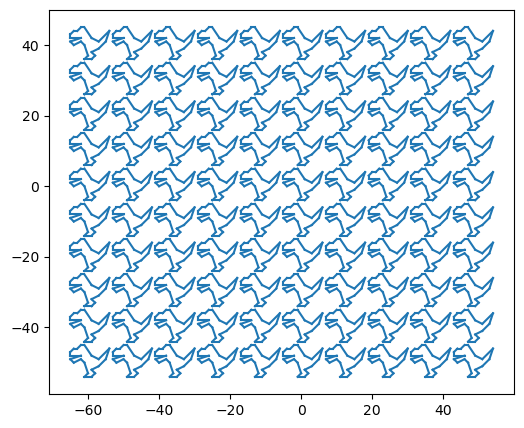

In [18]:
def hundred_dinos():
    # 计算好一个恐龙要占据的位置进行区隔
    translations = [(12 * x, 10 * y)
                    for x in range(-5, 5)
                    for y in range(-5, 5)]
    dinos = [Polygon(*translate(t, dino_vectors), color=blue)
             for t in translations]
    draw(*dinos, grid=None, axes=None, origin=None)


hundred_dinos()

In [19]:
from math import sqrt


def length(v):
    return sqrt(v[0] ** 2 + v[1] ** 2)


max(dino_vectors, key=length)

(6, 4)

In [20]:
def subtract(v1, v2):
    return (v1[0] - v2[0], v1[1] - v2[1])


# 计算2个向量之间距离
def distance(v1, v2):
    return length(subtract(v1, v2))

# 三角函数

In [21]:
from math import sin, cos


def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1]
    return (length * cos(angle), length * sin(angle))

In [22]:
from math import pi

angle = 37 * pi / 180
to_cartesian((5, angle))

(3.993177550236464, 3.0090751157602416)

In [23]:
from math import atan2


# 从极坐标转换到笛卡尔坐标
def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y, x)
    return (length(vector), angle)

In [24]:
to_polar((-2, 3))

(3.605551275463989, 2.158798930342464)